# **Spam Email Detection**
This project implements a spam email detection system using the DistilBERT model, a smaller and faster version of BERT (Bidirectional Encoder Representations from Transformers). The system is designed to classify email texts as either spam or not spam based on their content.

## **Project Overview**
The goal of this project is to leverage the powerful capabilities of transformer-based models, specifically DistilBERT, to accurately detect spam emails. Given a dataset containing email texts and labels indicating whether the emails are spam or not.
 ## **Dataset Description**
The dataset used in this project is a collection of email texts labeled as either spam (1) or not spam (0). The dataset is crucial for training the DistilBERT model to distinguish between spam and non-spam emails based on their content. Here's a brief overview of the dataset structure:

### **Columns**:

**text**: This column contains the body of the email. The text can vary in length and may include various elements such as subject
lines, greetings, and the main content.

**spam**: This column contains binary labels indicating whether the email is spam (1) or not spam (0).

## **Importing Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score
import torch

## **Load the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving emails.csv to emails.csv


In [ ]:
raw_data = pd.read_csv("emails.csv")

## **Preprocess Data**

In [ ]:
df = raw_data.copy()
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.isnull().sum()

,0
text,0
spam,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


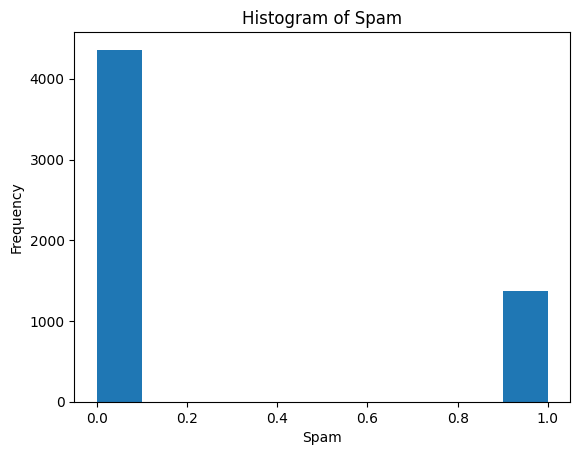

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of the 'spam' column
plt.hist(df['spam'])

# Add labels and title
plt.xlabel('Spam')
plt.ylabel('Frequency')
plt.title('Histogram of Spam')

# Display the histogram
plt.show()


# **Initialize the tokenizer and model**


In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## **Tokenize the email texts**

In [ ]:
# Tokenize the email texts
inputs = tokenizer(df['text'].tolist(), padding=True, truncation=True, return_tensors="pt", max_length=128)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## **Convert labels to tensor**

In [ ]:
labels = torch.tensor(df['spam'].values)


## **Create a TensorDataset**

In [ ]:
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)

## **Split the dataset into training and validation sets**

In [ ]:

train_size = int(0.8 * len(df))
val_size = len(df) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

## **Create DataLoaders for training and validation sets**


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

## **Set up the optimizer**




In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5)

## **Training the model and  Evaluate the model**



In [ ]:
model.train()
for epoch in range(3):  # Set the number of epochs
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} complete! Loss: {loss.item()}")

model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).flatten()
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1 complete! Loss: 0.006287517491728067
Epoch 2 complete! Loss: 0.003358997404575348
Epoch 3 complete! Loss: 0.0008434596820734441
Validation Accuracy: 0.9939
